In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download vipoooool/new-plant-diseases-dataset

 99% 2.67G/2.70G [00:29<00:00, 117MB/s]
100% 2.70G/2.70G [00:29<00:00, 99.3MB/s]


In [6]:
!unzip /content/new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

(256, 256, 3)


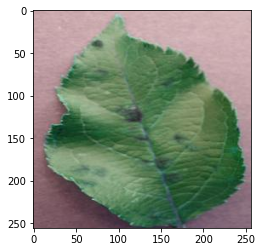

In [7]:
import cv2,matplotlib.pyplot as plt
img=cv2.imread('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG')
plt.imshow(img)
print(img.shape)

In [8]:
batch_size = 32
img_height = 100
img_width = 100

In [11]:
import tensorflow as tf
import keras
train_data_dir='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 70295 files belonging to 38 classes.
Using 56236 files for training.


In [12]:
validation_data_dir='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
validation_ds=tf.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir,
    subset='validation',
    validation_split=0.2,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 17572 files belonging to 38 classes.
Using 3514 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

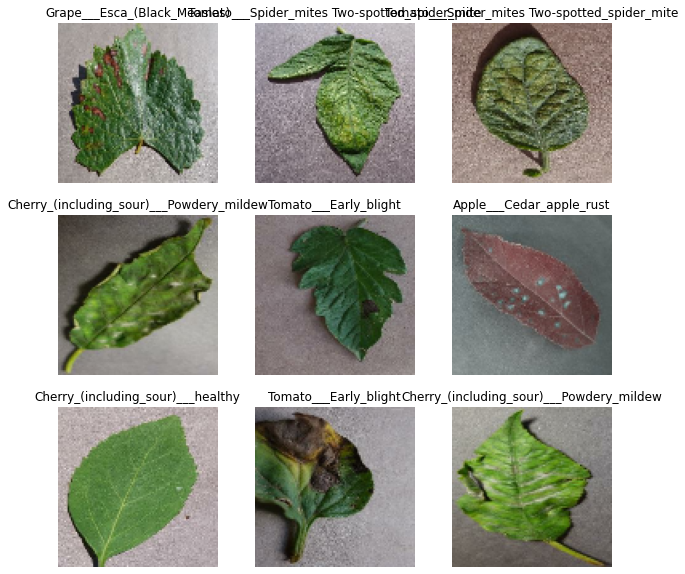

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 100, 3)
(32,)


In [17]:
'''AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)'''

'AUTOTUNE = tf.data.AUTOTUNE\n\ntrain_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)\nvalidation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)'

In [46]:
num_classes = 38
inputs=(100,100,3)
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=inputs),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes,activation='softmax')
])

In [47]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 64)       

In [48]:
model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=10
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1758/1758 [==============================] - 46s 26ms/step - loss: 1.7278 - accuracy: 0.4860 - val_loss: 0.8754 - val_accuracy: 0.7211
Epoch 2/10
1758/1758 [==============================] - 45s 25ms/step - loss: 0.6932 - accuracy: 0.7774 - val_loss: 0.6637 - val_accuracy: 0.7829
Epoch 3/10
1758/1758 [==============================] - 45s 26ms/step - loss: 0.4862 - accuracy: 0.8400 - val_loss: 0.4582 - val_accuracy: 0.8520
Epoch 4/10
1758/1758 [==============================] - 45s 25ms/step - loss: 0.3835 - accuracy: 0.8742 - val_loss: 0.5120 - val_accuracy: 0.8307
Epoch 5/10
1758/1758 [==============================] - 45s 26ms/step - loss: 0.3082 - accuracy: 0.8990 - val_loss: 0.3251 - val_accuracy: 0.8913
Epoch 6/10
1758/1758 [==============================] - 45s 26ms/step - loss: 0.2636 - accuracy: 0.9116 - val_loss: 0.3336 - val_accuracy: 0.8939
Epoch 7/10
1758/1758 [==============================] - 45s 26ms/step - loss: 0.2291 - accuracy: 0.9220 - val_loss: 0.2651 - val_accura

In [61]:
import numpy as np
img=cv2.imread('/content/test/test/AppleScab2.JPG')
_scale = lambda dim, s: int(dim * s / 100)
im: np.ndarray = cv2.imread('/content/test/test/AppleScab2.JPG')
width, height, channels = im.shape
scale_1=(100*100)/width
scale_2=(100*100)/height
print("{},{},{}".format(width,height,channels))
new_width: int = _scale(width, scale_1)
new_height: int = _scale(height, scale_2)
new_dim: tuple = (new_width, new_height)
image=cv2.resize(src=im, dsize=new_dim, interpolation=cv2.INTER_LINEAR)
image = image.reshape((100,100,3))  # RESHAPING
X = np.zeros((1,100,100, 3), dtype=np.float32)
X[0]=image
model.predict(X)

256,256,3


array([[1.1160185e-05, 1.0268976e-05, 2.6681445e-08, 5.8092253e-04,
        2.2631974e-09, 8.4740055e-09, 3.9991206e-05, 7.2023823e-08,
        3.6066201e-08, 3.1652727e-09, 4.2040182e-10, 1.7713027e-08,
        4.9184315e-12, 1.5641814e-14, 2.2447351e-07, 9.9924040e-01,
        4.9140535e-06, 6.9474353e-08, 3.5803455e-06, 1.0156421e-04,
        3.5707087e-10, 4.2758661e-08, 8.9268228e-09, 9.8630250e-11,
        2.4737328e-06, 1.7901826e-13, 2.1930064e-12, 6.2586623e-11,
        2.3536649e-07, 3.1891298e-06, 7.2691694e-07, 5.2266586e-10,
        3.5413759e-09, 3.2841435e-10, 1.2154670e-08, 2.2924412e-12,
        6.8894963e-18, 1.2935599e-11]], dtype=float32)

In [60]:
np.where(model.predict(X)== np.amax(model.predict(X)))

(array([0]), array([19]))

In [74]:
import numpy as np
img=cv2.imread('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/0631708e-5bac-4611-8ff9-6d5ee87ce3b3___FREC_Scab 3252_270deg.JPG')
_scale = lambda dim, s: int(dim * s / 100)
im: np.ndarray = cv2.imread('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/0631708e-5bac-4611-8ff9-6d5ee87ce3b3___FREC_Scab 3252_270deg.JPG')
width, height, channels = im.shape
scale_1=(100*100)/width
scale_2=(100*100)/height
print("{},{},{}".format(width,height,channels))
new_width: int = _scale(width, scale_1)
new_height: int = _scale(height, scale_2)
new_dim: tuple = (new_width, new_height)
image=cv2.resize(src=im, dsize=new_dim, interpolation=cv2.INTER_LINEAR)
image = image.reshape((100,100,3))  # RESHAPING
X = np.zeros((1,100,100, 3), dtype=np.float32)
X[0]=image
model.predict(X)

256,256,3


array([[4.2548690e-02, 2.3792828e-02, 1.3681375e-06, 8.0585480e-04,
        8.2727633e-03, 5.3653736e-07, 3.1556553e-04, 1.9851691e-09,
        7.1147210e-14, 1.1983818e-16, 3.5013591e-14, 3.6760730e-06,
        1.2488765e-05, 1.1739498e-14, 1.3615488e-04, 6.4535982e-10,
        2.3139530e-06, 2.7061033e-04, 1.5149103e-04, 7.9412168e-01,
        9.1463681e-07, 2.2488857e-04, 9.6756063e-02, 8.0478378e-07,
        6.4270874e-03, 1.7105966e-11, 8.2314946e-14, 3.7264766e-05,
        1.1230577e-06, 3.0708738e-04, 1.5319549e-06, 2.6994156e-05,
        2.0761365e-02, 3.1934576e-07, 3.0706206e-03, 6.0434004e-08,
        1.9479393e-03, 1.6783125e-09]], dtype=float32)

In [75]:
np.where(model.predict(X)== np.amax(model.predict(X)))

(array([0]), array([19]))